<a href="https://colab.research.google.com/github/JozueDev/Proyecto-de-Regresi-n-Log-stica/blob/main/src/explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore here

In [2]:
# 1. Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# 2. Cargar el dataset
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep = ";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# 3. Exploración inicial
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

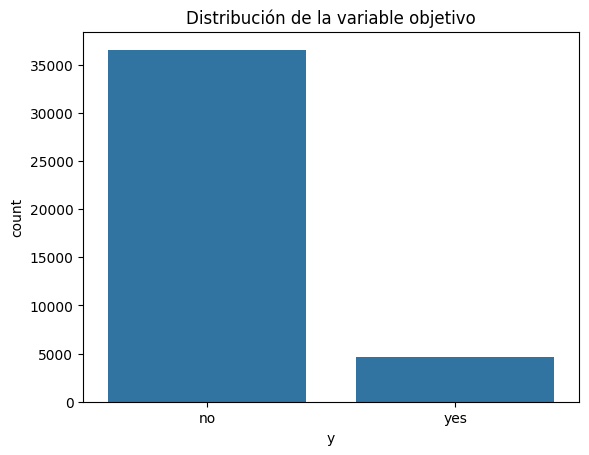

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

In [5]:
# 4. Análisis de la variable objetivo (binaria)
sns.countplot(x='y', data=df)
plt.title('Distribución de la variable objetivo')
plt.show()
df['y'].value_counts(normalize=True)

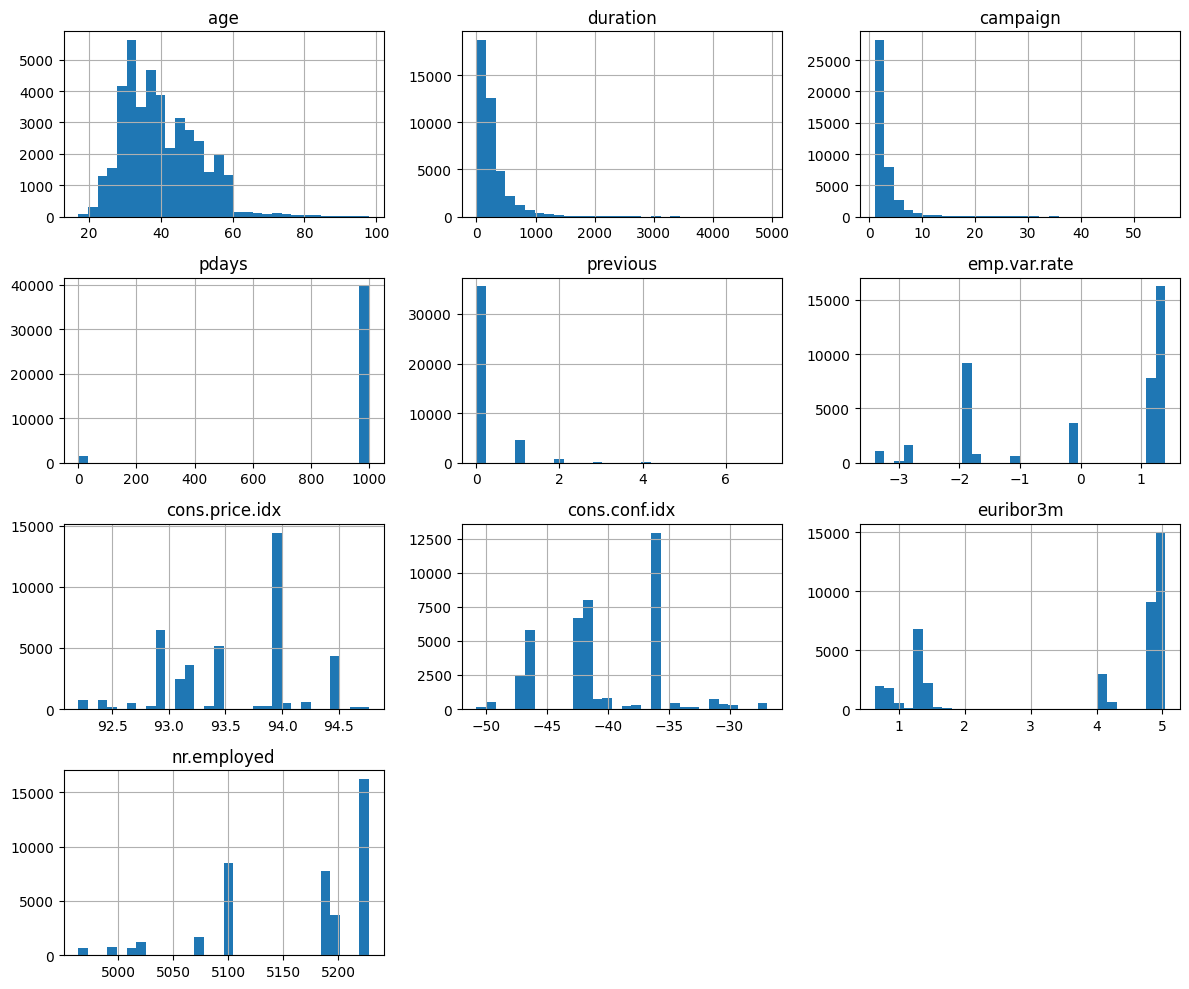

In [6]:
# 5. Análisis univariado de variables numéricas
df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

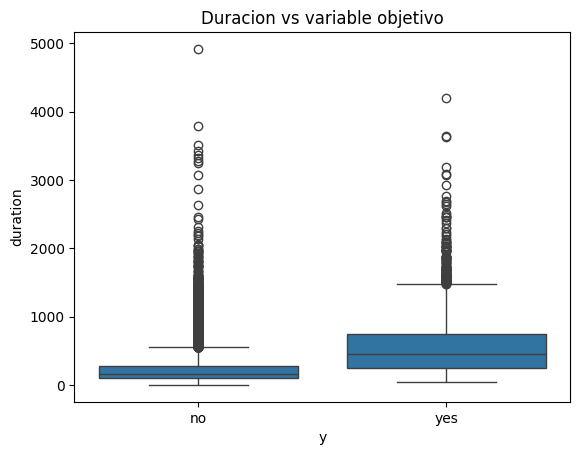

In [7]:
# 6. Análisis bivariado: Numérica vs Target
sns.boxplot(x='y', y='duration', data=df)
plt.title('Duracion vs variable objetivo')
plt.show()

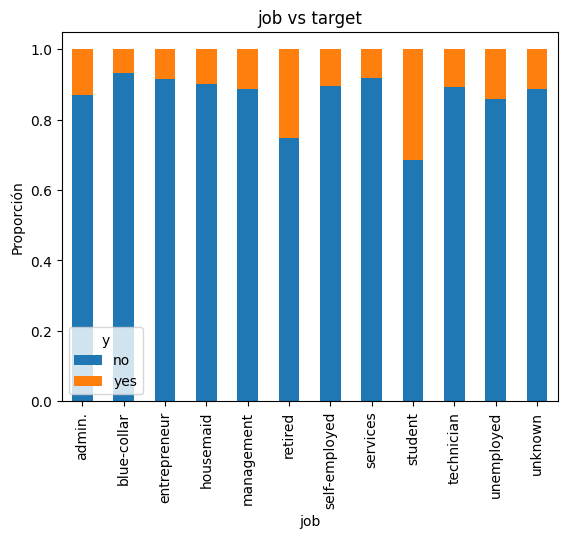

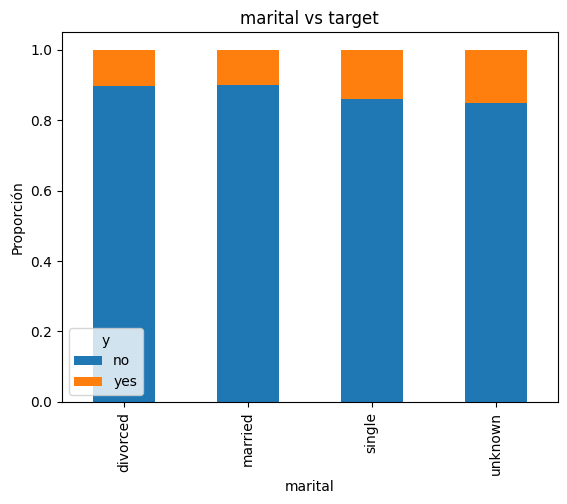

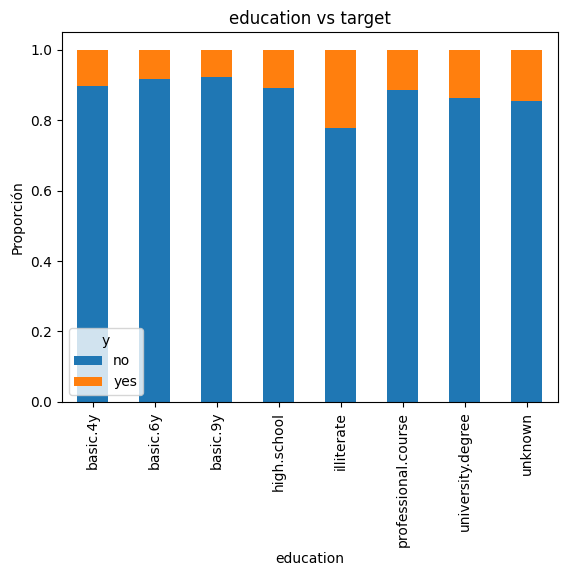

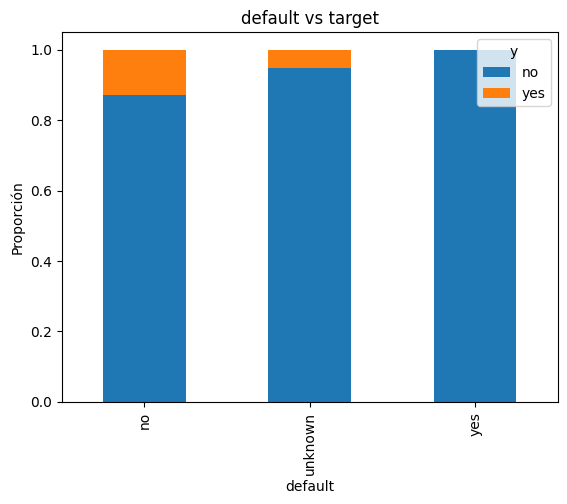

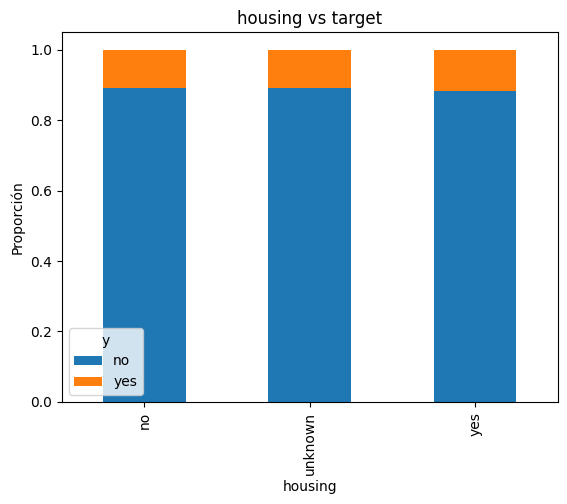

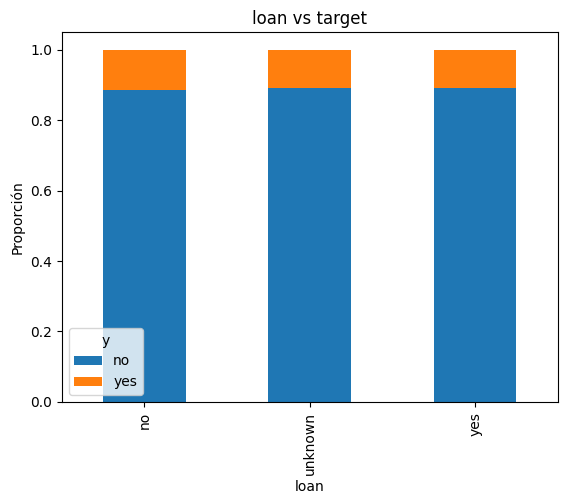

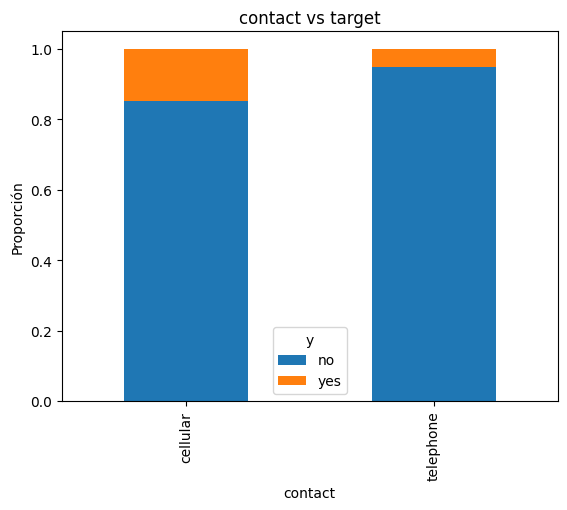

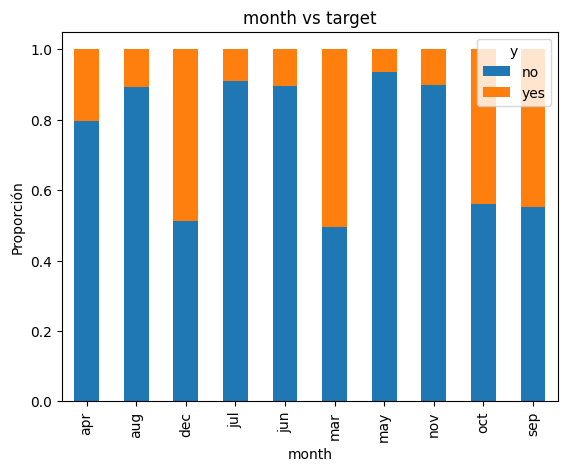

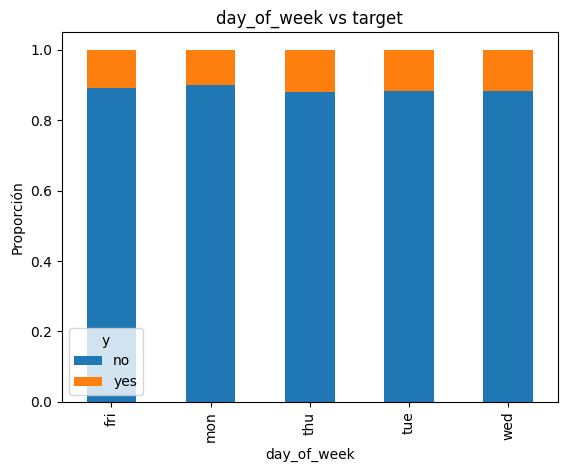

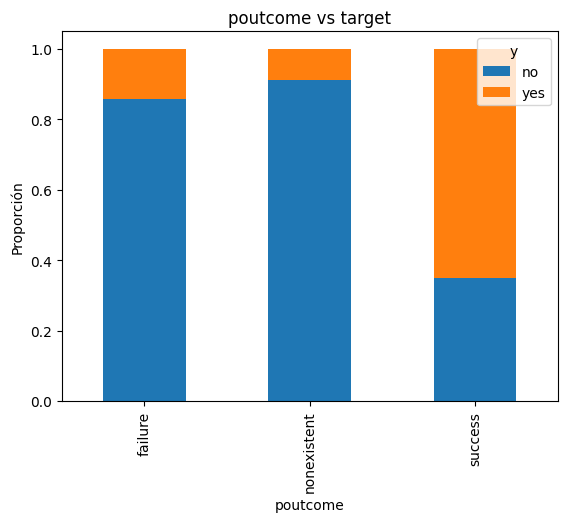

In [8]:
# 7. Análisis bivariado: Categórica vs Target
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for var in cat_vars:
    ct = pd.crosstab(df[var], df['y'], normalize='index')
    ct.plot(kind='bar', stacked=True, title=f'{var} vs target')
    plt.ylabel('Proporción')
    plt.show()

In [9]:
#convertir en binario
print(df['y'].unique())
# Asegura texto limpio
df['y'] = df['y'].astype(str).str.strip().str.lower()

# Mapear a binario
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Verifica que no se perdió nada
print(df['y'].value_counts(dropna=False))


['no' 'yes']
y
0    36548
1     4640
Name: count, dtype: int64


In [10]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [11]:
X = df_encoded.drop('y', axis=1)
Y = df_encoded['y']


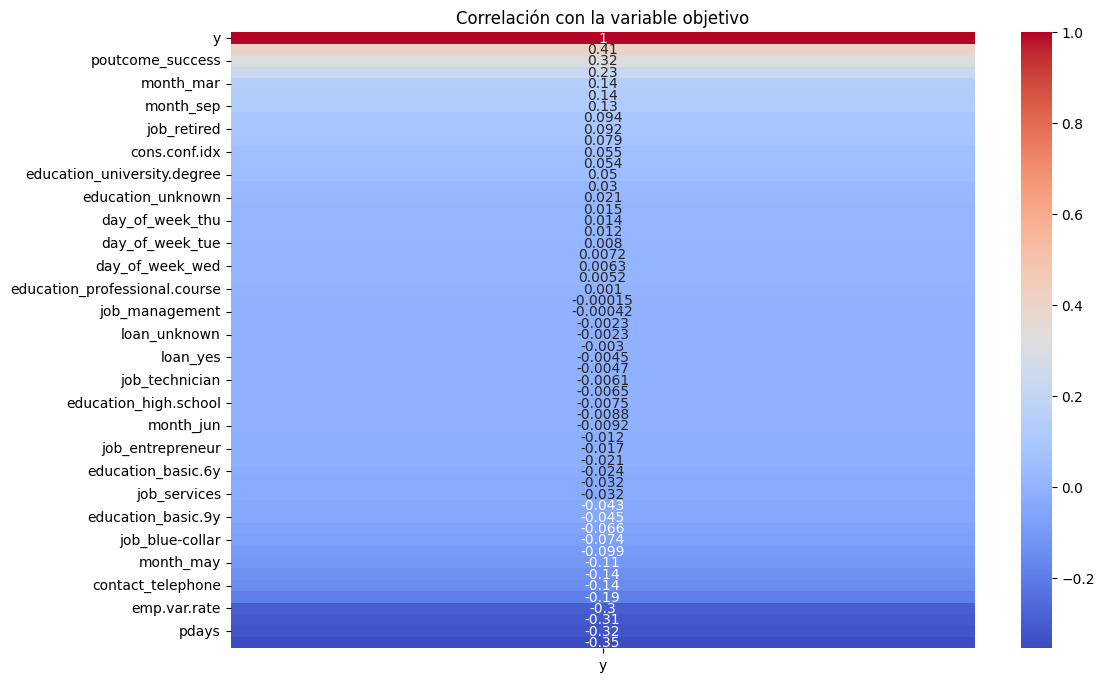

In [12]:
# 9. Correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr()[['y']].sort_values(by='y', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlación con la variable objetivo')
plt.show()

In [13]:
# 10. Escalado de variables numéricas
scaler = StandardScaler()
cols_to_scale = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])


In [14]:
# 11. Separar variables y entrenar modelo
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(class_weight='balanced', max_iter=1000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Matriz de confusión
print("📊 Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Reporte de métricas
print("\n📋 Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# AUC-ROC
y_prob = model.predict_proba(X_test)[:, 1]
print("🔵 AUC-ROC:", roc_auc_score(y_test, y_prob))


📊 Matriz de confusión:
[[6259 1044]
 [ 101  834]]

📋 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      7303
           1       0.44      0.89      0.59       935

    accuracy                           0.86      8238
   macro avg       0.71      0.87      0.75      8238
weighted avg       0.92      0.86      0.88      8238

🔵 AUC-ROC: 0.9020351317054525


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Análisis:
El modelo tiene alta precisión y recall para la clase 0 (clientes que no contrataron).

Para la clase 1 (clientes que sí contrataron):

Precision del 67%: cuando predice que alguien contratará, acierta 2 de cada 3 veces.

Recall del 43%: solo detecta correctamente al 43% de los que realmente contrataron.

F1-Score bajo (0.52) → indica que no está equilibrado entre precisión y recall en esta clase.

Problema: desbalance de clases
Clase 0: 7303 ejemplos

Clase 1: 935 ejemplos
El modelo se entrena con muchos más negativos que positivos, así que tiende a ignorar los pocos 1s

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from scipy.stats import loguniform

# Escalado de variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Hiperparámetros a explorar
param_dist = {
    'C': loguniform(0.001, 100),                 # Distribución log-uniforme
    'solver': ['lbfgs', 'saga'],
    'class_weight': ['balanced', None],
    'penalty': ['l2']
}

# Configurar búsqueda aleatoria
random_search = RandomizedSearchCV(
    LogisticRegression(max_iter=5000),
    param_distributions=param_dist,
    n_iter=10,                     # Número de combinaciones aleatorias a probar
    scoring='f1',
    cv=5,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Entrenamiento
random_search.fit(X_train, y_train)

# Mejor modelo
best_model = random_search.best_estimator_
print("Mejores hiperparámetros:", random_search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores hiperparámetros: {'C': np.float64(4.5705630998014515), 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
